In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder, StandardScaler, normalize
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from scipy import stats
from xgboost import XGBClassifier, plot_importance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn import metrics
from sklearn.utils import resample
import pickle

%matplotlib inline

# Uploading the Data

Data Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
#Uploading the document
df=pd.read_csv('C:/Users/dgardunohorneffer/Desktop/heart.csv')

In [3]:
#Printing the first five columns of the dataframe
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Cleaning and Understanding Data

In [4]:
#Shows all the columns that we have
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
#Gives the types of the columns that we have
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
#We have a total of 918 rows and 12 columns
df.shape

(918, 12)

In [7]:
#We have a balanced data set
df.HeartDisease.value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [8]:
#Describe the statistics of the data, only includes numerical values
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
#Checking if we have duplicated data
#We dont have duplicated data
duplicates= df[df.duplicated()]
print(len(duplicates))

0


In [10]:
#Checking if we have NaN Values
#We dont have null values
null_values=df.isna().sum()
null_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Now, we will be analyzing each individual column to find the patterns and understand the distribution of the dataset.

1. What is the distribution of Age in the dataset?
    * This visualization will help us understand the age distribution of patients with heart disease. It will help us identify if there is a specific age group that is more prone to heart disease.
    * We are able to see that in general, people between ages from 50-65 tend to have a heart disease
    * People with a heart disease tend to be older

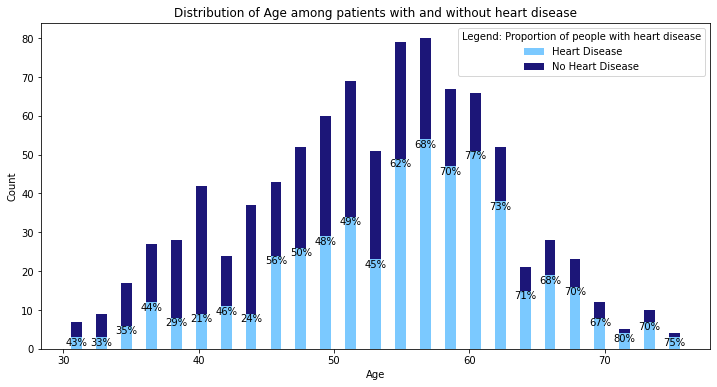

In [11]:
# Data filtered by HeartDisease status
hd_data = df[df['HeartDisease'] == 1]
no_hd_data = df[df['HeartDisease'] == 0]

# Calculate histogram for both groups
hd_hist, hd_bins = np.histogram(hd_data['Age'], bins=25)
no_hd_hist, _ = np.histogram(no_hd_data['Age'], bins=hd_bins)

# Calculating total counts per bin (sum of hd_hist and no_hd_hist)
total_hist = hd_hist + no_hd_hist

# Calculating the percentage of patients with heart disease in each bin
percentage_hd = (hd_hist / total_hist) * 100

# Plotting stacked histograms
plt.figure(figsize=(12, 6))
bars_hd = plt.bar(hd_bins[:-1], hd_hist, color='#7BC9FF', label='Heart Disease')
bars_no_hd = plt.bar(hd_bins[:-1], no_hd_hist, bottom=hd_hist, color='#1C1678', label='No Heart Disease')

# Adding axis labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age among patients with and without heart disease', wrap=True)
plt.legend(title='Legend: Proportion of people with heart disease')

# Adding percentage labels
for bar, percentage in zip(bars_hd, percentage_hd):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.0f}%', ha='center', va='top', color='black')

plt.show()


2. What is the gender distribution of the patients in the dataset?
    * This visualization will help us understand the gender distribution of the patients in the dataset and identify any potential gender-based patterns or trends.
    * we can see that our data tends to be skewed toward males
    * In addition male are more propense to have a heart disease

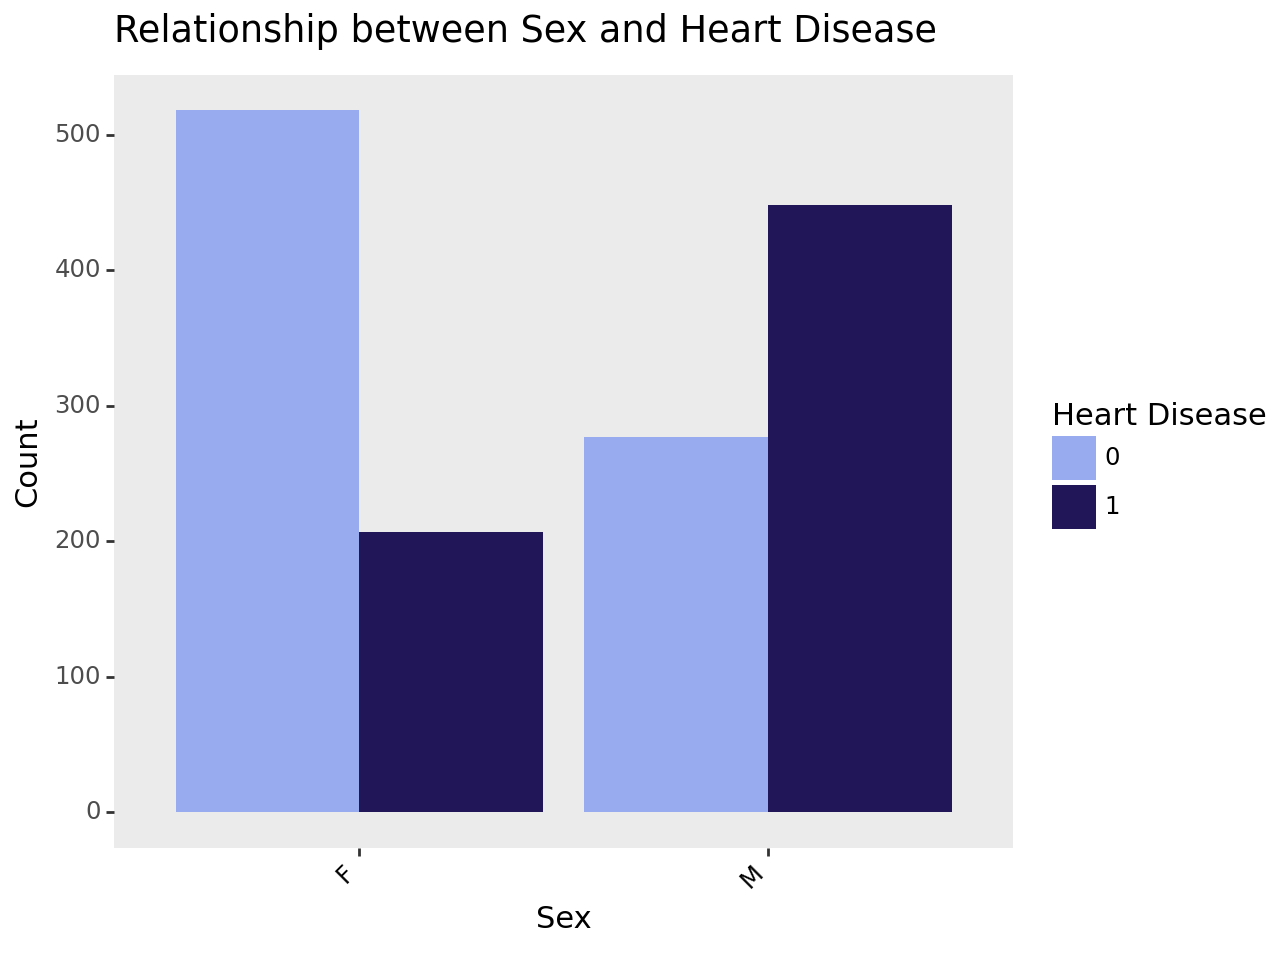

<Figure Size: (640 x 480)>

In [12]:
#normalizing the counts of females and males
def normalize_column(df, column):
    # Find the counts of each category
    counts = df[column].value_counts()
    max_count = counts.max()
    
    # List to hold the re-sampled DataFrames
    resampled_dfs = []
    
    # Up-sample each category
    for category in counts.index:
        category_df = df[df[column] == category]
        resampled_category_df = resample(category_df, replace=True, n_samples=max_count, random_state=42)
        resampled_dfs.append(resampled_category_df)
    
    # Concatenate all the re-sampled DataFrames
    normalized_df = pd.concat(resampled_dfs)
    
    return normalized_df

def plotting(df, column):
        """
        Input: Dataframe and a column to plot
        Output: Bar graph of the relationship of the column selected and having a heart disease
        """
        return (p9.ggplot(df, p9.aes(x=column, fill='factor(HeartDisease)')) + 
                 p9.geom_bar(position='dodge') + 

                 #Adding title and axis
                 p9.labs(title=f'Relationship between {column} and Heart Disease', 
                         x=column, y='Count', fill='Heart Disease') +

                 #Personalizing the grid
                 p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1, color= 'black'),
                         panel_grid_major=p9.element_blank(),
                         panel_grid_minor=p9.element_blank()) +
                 p9.scale_fill_manual(values=['#98ABEE', '#201658']) + 
                 p9.theme(legend_position='right'))

# Normalize the 'Sex' column
normalized_df = normalize_column(df, 'Sex')
plotting(normalized_df, 'Sex')

3. What is the distribution of Chest Pain Type in the dataset?
    * This visualization will help us understand the distribution of chest pain types among the patients in the dataset and identify any potential patterns or trends.
    * we can see that the chest pain of ASY is mostly related to a heart disease. TA is also 50% likely of having a heart disease

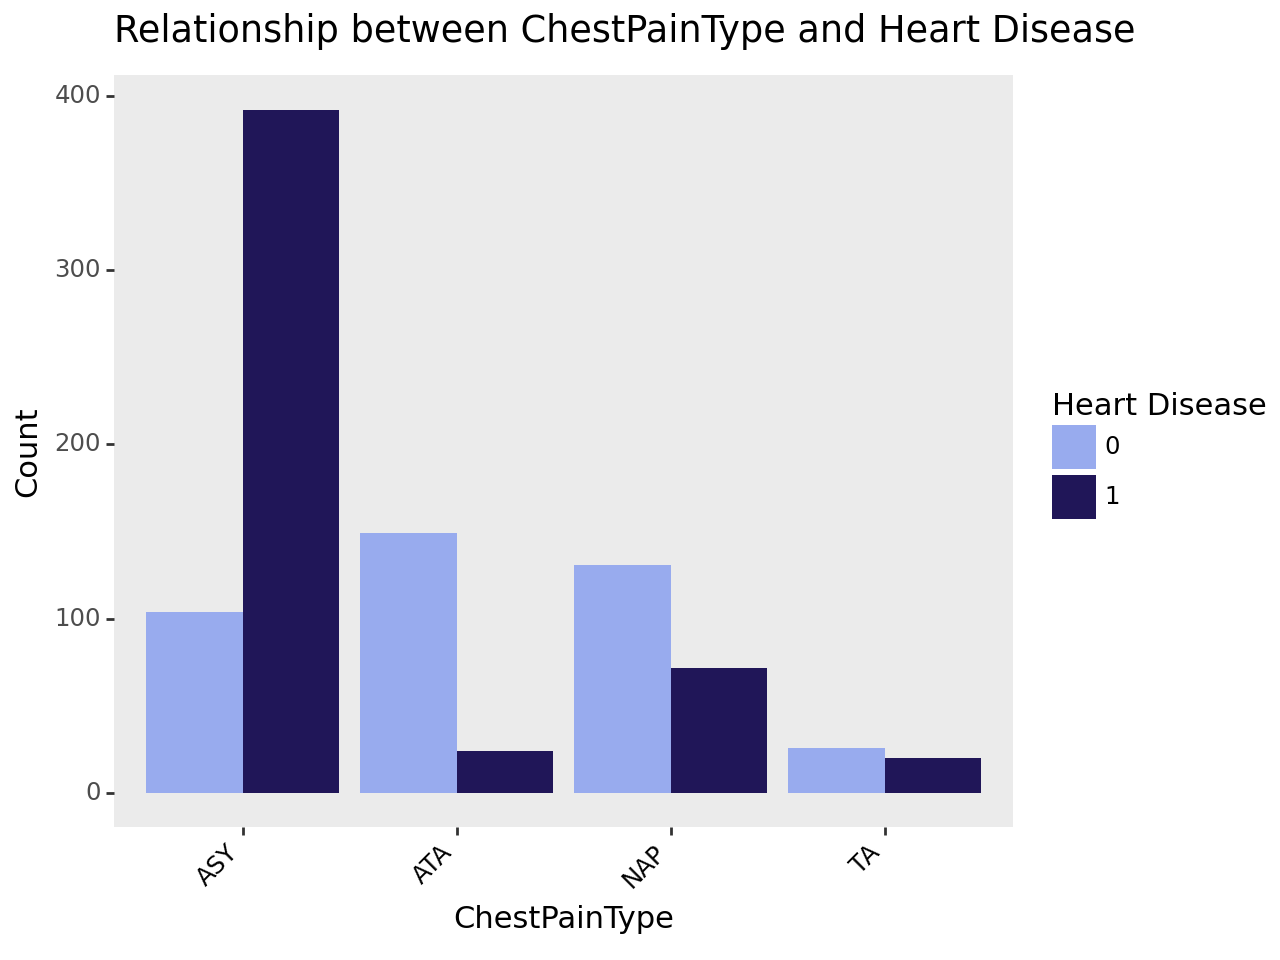

<Figure Size: (640 x 480)>

In [13]:
plotting(df, 'ChestPainType')

4. What is the relationship between exercise-induced angina and heart disease?
    * This visualization will help us understand the relationship between exercise-induced angina and heart disease. It will help us identify if there is a correlation between the two variables and if exercise-induced angina can be used as a predictor for heart disease.
    * we can see that people tend to have a heart disease more often when they have exercise-induced angina.



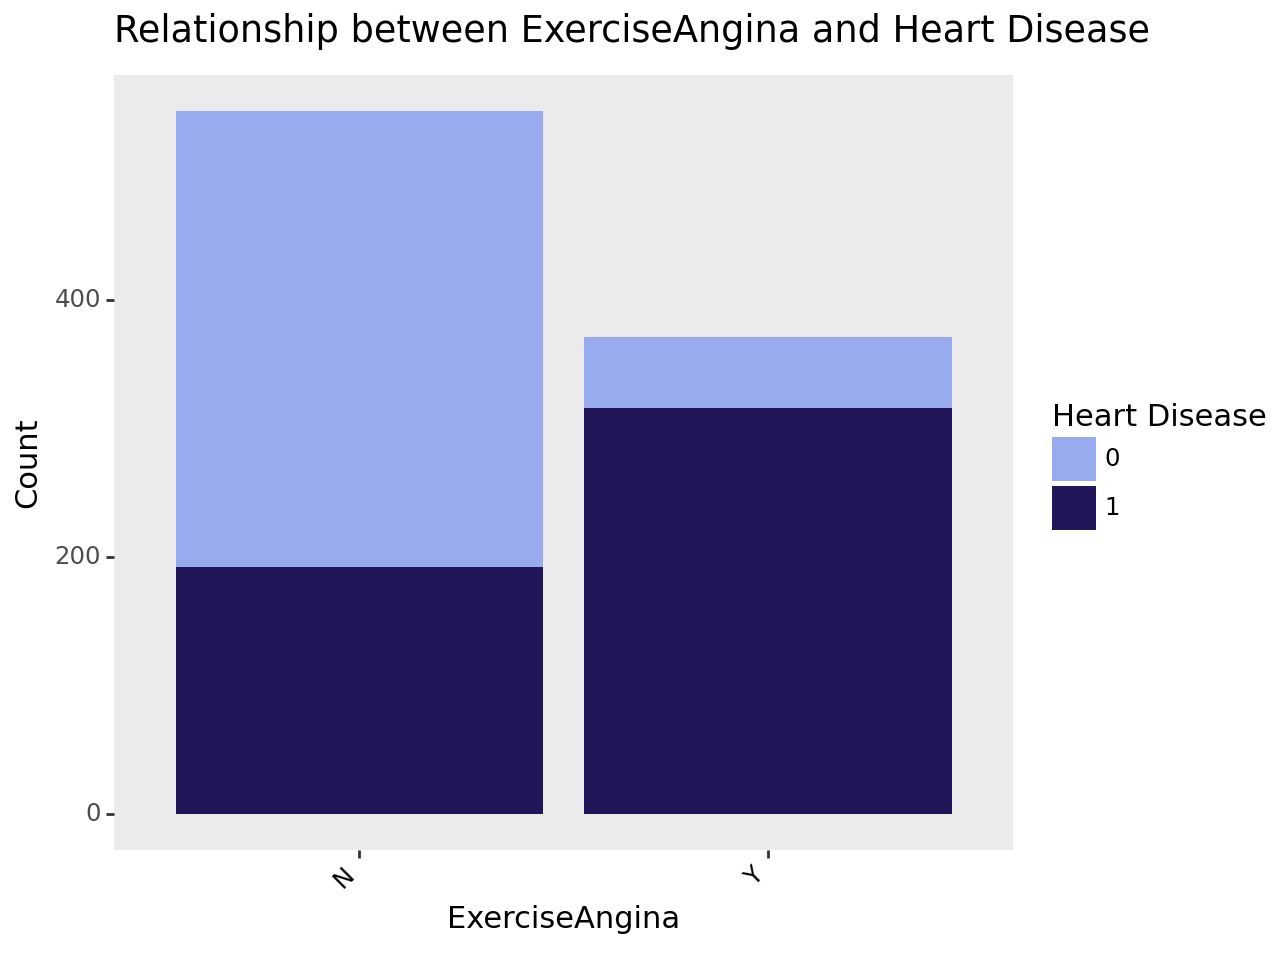

<Figure Size: (640 x 480)>

In [14]:
def plotting2(df, column):
        """
        Input: Dataframe and a column to plot
        Output: Stacked bar graph of the relationship of the column selected and having a heart disease
        """
        return (p9.ggplot(df, p9.aes(x=column, fill='factor(HeartDisease)')) +
            p9.geom_bar(position='stack') +  
            
            #Adding title and axis    
            p9.labs(title=f'Relationship between {column} and Heart Disease',
                    x=column, y='Count', fill='Heart Disease') +
                
            #Personalizing the grid
            p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1, color="black"),
                     panel_grid_major=p9.element_blank(),
                     panel_grid_minor=p9.element_blank()) +
            p9.scale_fill_manual(values=['#98ABEE', '#201658']) +
            p9.theme(legend_position='right'))


plotting2(df, 'ExerciseAngina')

5. What is the relationship between resting ECG  and heart disease?
    * This visualization will help us understand the relationship between resting ECG and heart disease. It will help us identify if there is a correlation between the two variables and if resting ECG can be used as a predictor for heart disease.
    * we can see that in general resting ECG is not as related to having a heart disease or not. IN all of the cases there is 50% of people having a heart disease and the other 50% not having a heart disease. Not the most correlated variable.

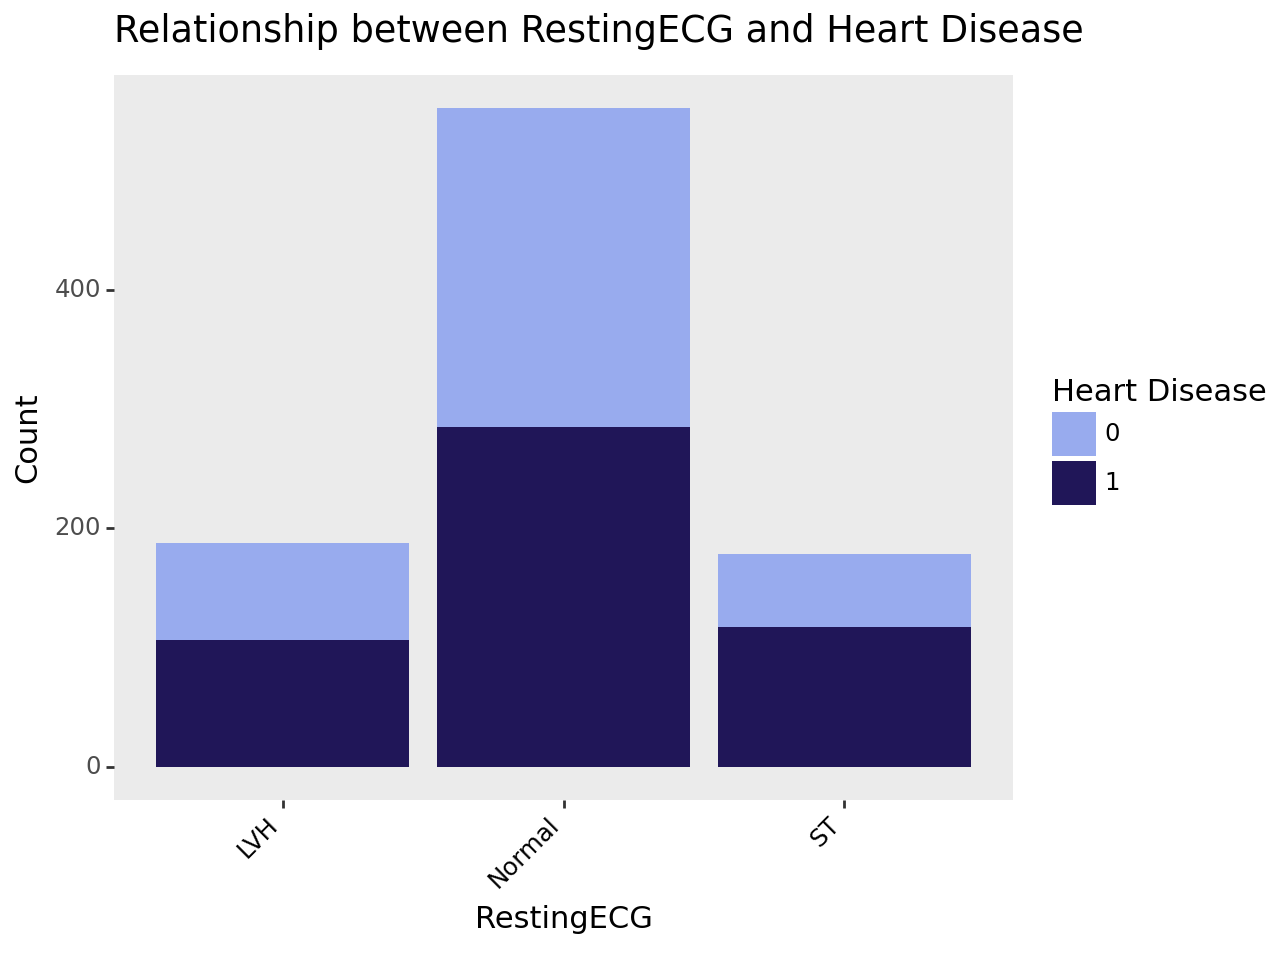

<Figure Size: (640 x 480)>

In [15]:
plotting2(df, 'RestingECG')

6. What is the relationship between ST_Slope  and heart disease?
    * This visualization will help us understand the relationship between ST_Slope and heart disease. It will help us identify if there is a correlation between the two variables and if ST_Slope can be used as a predictor for heart disease.
    * this variables are higly correlated. People that have a 'down' and 'flat' ST_Slope are the patients that tend to be more propense to have a heart disease.

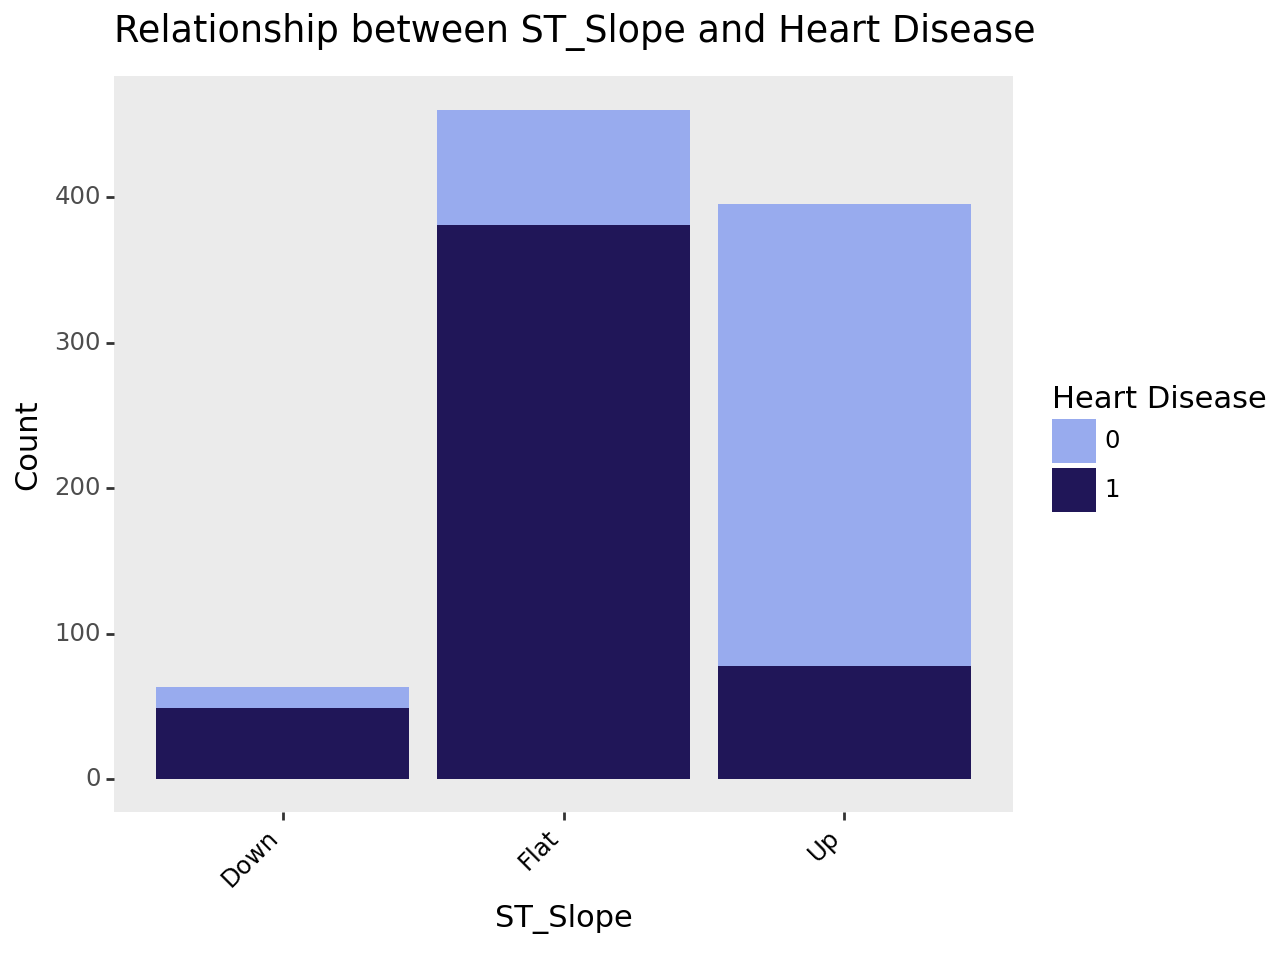

<Figure Size: (640 x 480)>

In [16]:
plotting2(df, 'ST_Slope')

7. What is the distribution of maximum heart rate achieved among patients with heart disease?

    * This visualization will help us understand the distribution of maximum heart rate achieved among patients with heart disease. It will help us identify if there is a specific range of maximum heart rate achieved that is more common among patients with heart disease
    * The most common heart range for people that have a heart disease is around 120.  
    * The most common heart range for people that dont have a hear disease is around 175.
    * People with heart disease are shifted 
    * Age and Maximum Heart rate does not appear to be related

In [17]:
def histogram_graph():
    """
    Input: DataFrame 'df' with columns 'HeartDisease' and 'MaxHR'
    Output: Histogram of the relationship between having heart disease and maximum heartbeats
    """
    # Creating a new column 'Group' that transforms numeric values to categorical values
    df['Group'] = df['HeartDisease'].map({1: 'With Heart Disease', 0: 'Without Heart Disease'})
    
    # Calculates the median line for each group
    median_values = df.groupby('Group')['MaxHR'].median().reset_index()
    median_values['Label'] = 'Median'  # Adding a label for the legend

    plot = (
        p9.ggplot(df, p9.aes(x='MaxHR')) +
        p9.geom_histogram(bins=30, fill='blue', alpha=0.5) +
        p9.facet_wrap('~Group') +

        # Adding title and axis to the graph
        p9.labs(title='Distribution of Maximum Heart Rate by Heart Disease Status',
                x='Maximum Heart Rate', y='Count') +

        # Personalizing grid and adding median lines
        p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1)) +
        p9.geom_vline(data=median_values, mapping=p9.aes(xintercept='MaxHR', linetype='Label'), color='red') +
        p9.guides(linetype=p9.guide_legend(title='Statistics')) +
        p9.scale_linetype_manual(values=['dashed'])  # Ensuring the line type is dashed
    )
    
    return plot


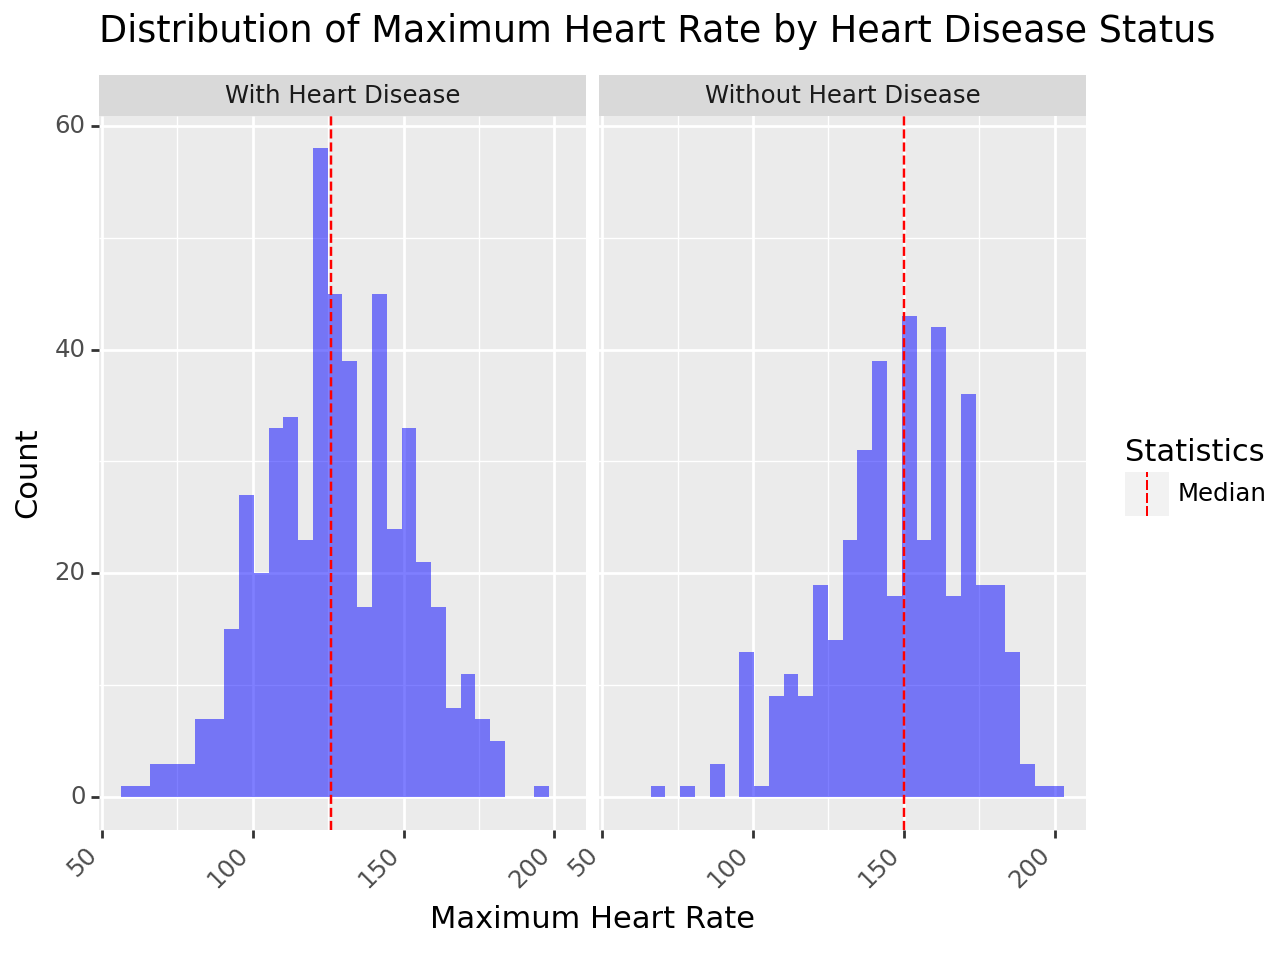

<Figure Size: (640 x 480)>

In [18]:
histogram_graph()

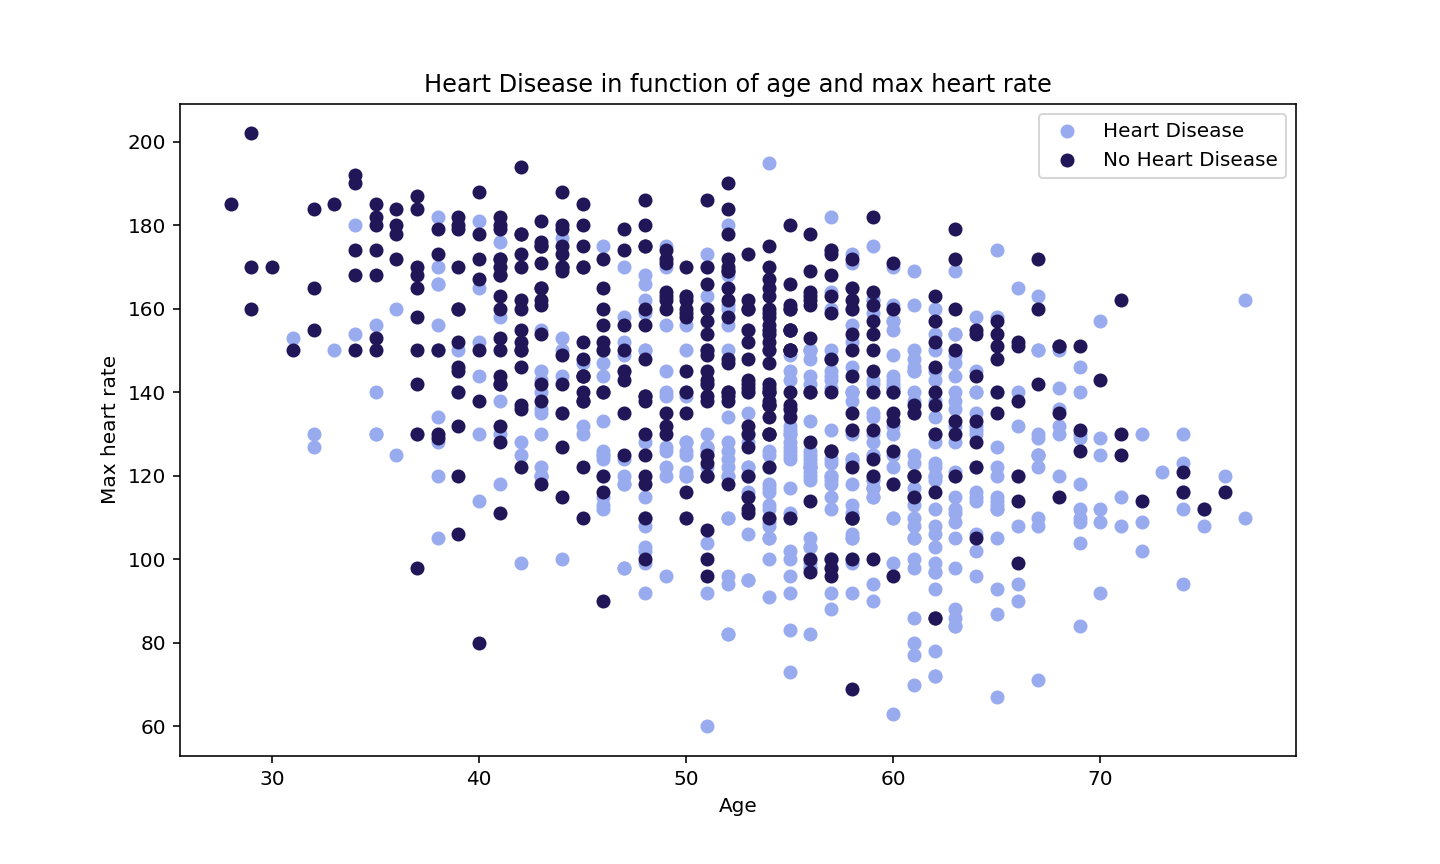

In [19]:
#Checking to see if max heart rate is related with age and heart disease as well
#create a figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.Age[df.HeartDisease==1],
           df.MaxHR[df.HeartDisease==1],
           c='#98ABEE')

#scatter with negative examples
plt.scatter(df.Age[df.HeartDisease==0],
           df.MaxHR[df.HeartDisease==0],
           c='#201658')

#Add labels
plt.title('Heart Disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.xticks(rotation=0);

8. What is the relationship between resting blood pressure and heart disease?
    * This visualization will help us understand the relationship between resting blood pressure and heart disease. It will help us identify if there is a correlation between the two variables and if resting blood pressure can be used as a predictor for heart disease.
    * we can see that this varibale is not that correlated either to having a heart disease or not.
    * However, people that have a higher resting blood pressure than the mean, tend to be more likely to have a heart disease. The same trend is going on with cholesterol. Not the most correlated variables in the dataset.
   

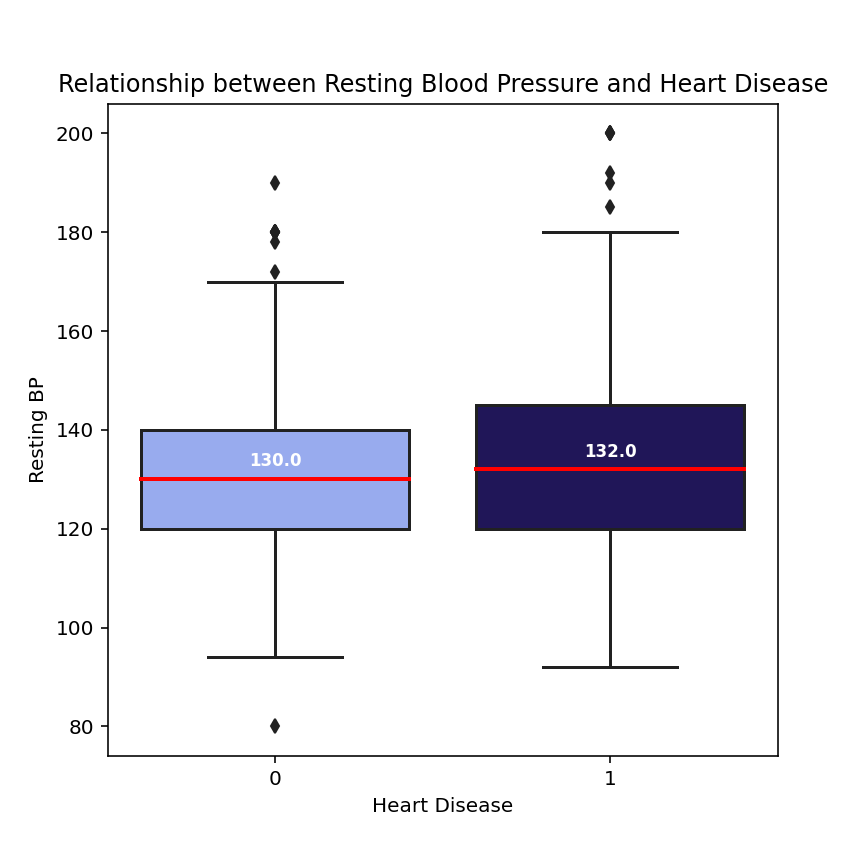

In [20]:
plt.figure(figsize=(6,6))
# Take out outlier zero, take heart disease and RestingBP to create box and whisker; use redline to denote median
zero_set = df[df["RestingBP"] != 0]
bp_plot = sns.boxplot(data=zero_set, x = "HeartDisease", y = "RestingBP", palette=['#98ABEE', '#201658'],
           saturation = 1, medianprops={"color": "r", "linewidth": 2})

# Calculate median for display
medians = zero_set.groupby(['HeartDisease'])['RestingBP'].median()
vertical_offset = zero_set['RestingBP'].median() * 0.02 # offset from median for display

# Add median values and label graph
for xtick in bp_plot.get_xticks():
    bp_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
bp_plot = bp_plot.set(title = 'Relationship between Resting Blood Pressure and Heart Disease', xlabel = "Heart Disease",
                     ylabel = "Resting BP")

9. What is the relationship between old peak and heart disease in the dataset?
    * This visualization will help us understand if the oldpeak value is related to the heart disease
    * If the old peak values lies outside the range [0,2.5] it is more likely to have a heart disease.

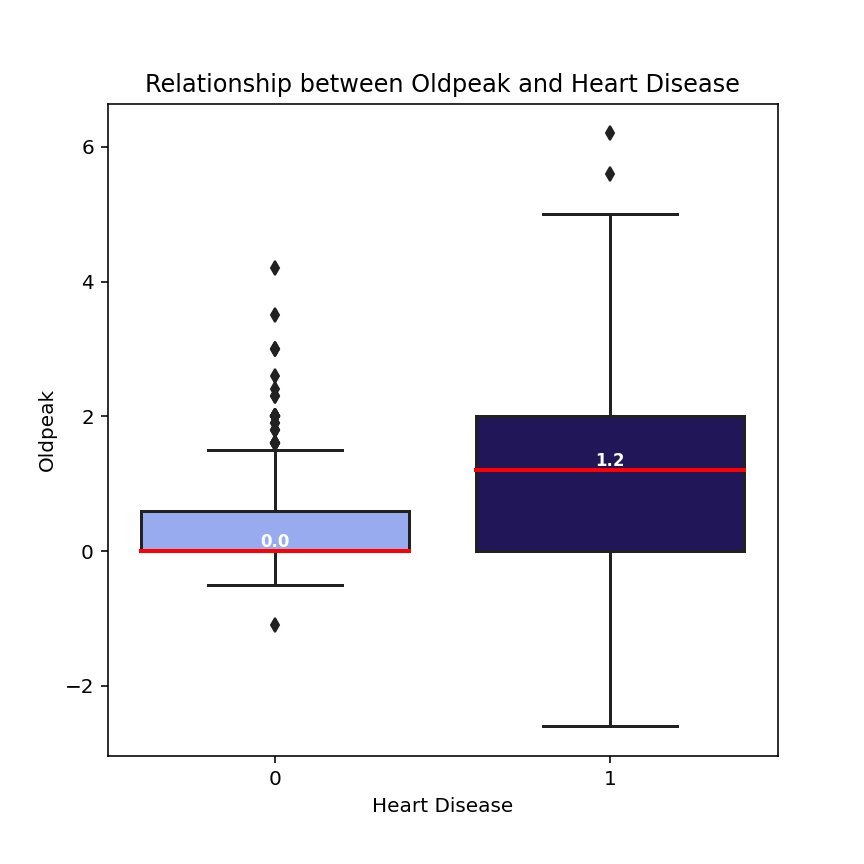

In [21]:
plt.figure(figsize=(6,6))
# Take heart disease and Oldpeak to create box and whisker; use redline to denote median
bp_plot = sns.boxplot(data=df, x = "HeartDisease", y = "Oldpeak",  palette=['#98ABEE', '#201658'],
           saturation = 1, medianprops={"color": "r", "linewidth": 2})

# Calculate median for display
medians = df.groupby(['HeartDisease'])['Oldpeak'].median()

# print(df[df['HeartDisease'] == 0]['Oldpeak'].median()) #0.0
vertical_offset = df['Oldpeak'].median() * 0.10 # offset from median for display

# Add median values and label graph
for xtick in bp_plot.get_xticks():
    bp_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
bp_plot = bp_plot.set(title = 'Relationship between Oldpeak and Heart Disease', xlabel = "Heart Disease",
                     ylabel = "Oldpeak")

Checking to see if our variables are correlated
 *  the variables that are mostly correlated:
    * old_peak with heart disease
    * age and oldpeak
    * age with heart diseases
    * heart disease with the maximum heartbeat

We can conclude that the features that affect the most in wether a patient has a heart disease are: old peak, age, sex, and heartbeats


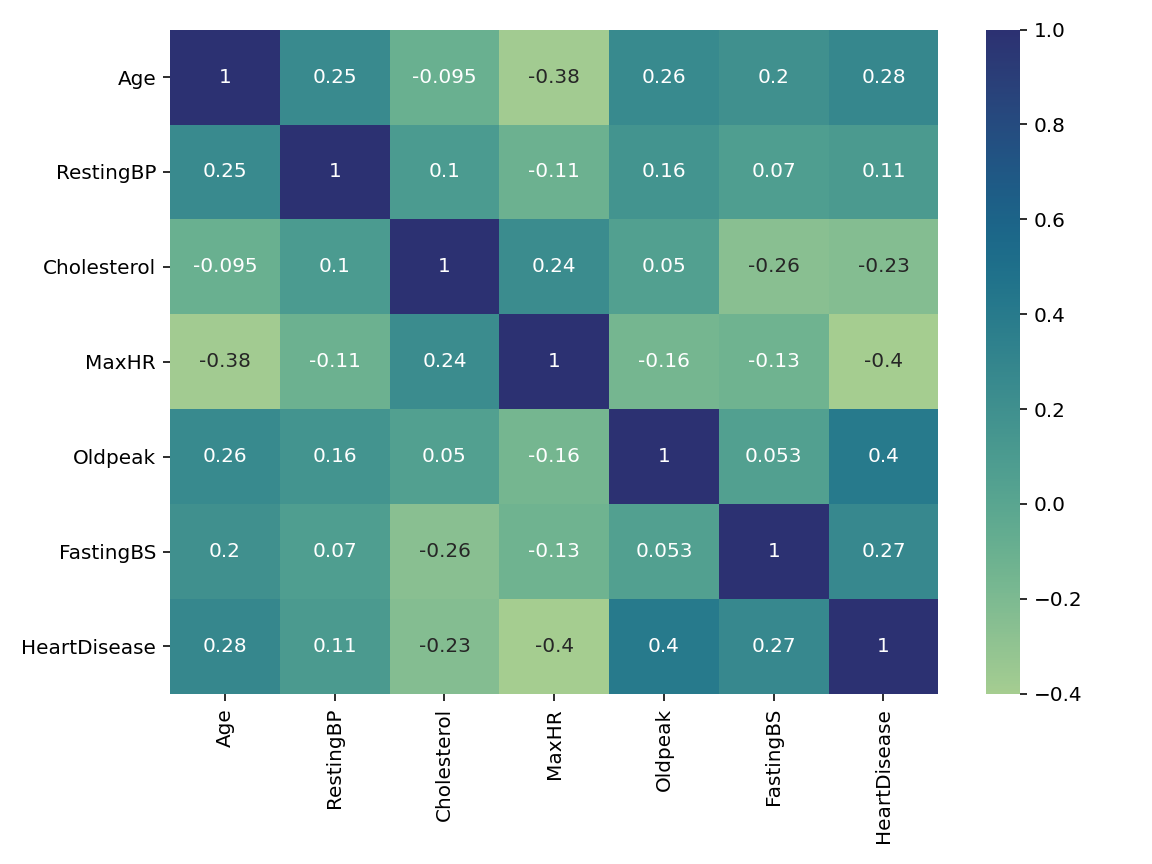

In [22]:
#we must only take intro consideration variables that are numerical
df1=df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS', 'HeartDisease']]

#creating the correlation matrix
corr_matrix=df1.corr()

#creating the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="crest");
plt.tight_layout();

# Preparing the Data

In [23]:
#Definig the features and the target variable
df.drop(columns='Group', axis=1, inplace=True)
y=df['HeartDisease']
X=df.drop(columns=['HeartDisease'],axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [24]:
#Splitting the data into test and training sets
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=11)

Formatting the one-hot-econder so that the columns have the same name as the original data source

In [25]:
def data_preparation(X_train):
    """
    Input: A set of Data
    Output: Return a standarized data frame where all categorical columns have been changed to numerical 
    
    """
    # Define numerical and categorical columns
    numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']
    categorical_columns = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope', 'RestingECG']

    # Create a column transformer
    col_transformer = ColumnTransformer(transformers=[
        ("ohe", OneHotEncoder(categories="auto", handle_unknown="ignore"), categorical_columns)
    ], remainder="passthrough")

    # Create a pipeline containing the single column transformer
    pipe = Pipeline(steps=[
    ("col_transformer",col_transformer),
    ("scale", StandardScaler())
    ])

    # Use the pipeline to fit and transform the data
    transformed_data = pipe.fit_transform(X_train)

    # Extract the category labels from the OHE within the pipeline
    encoder = col_transformer.named_transformers_["ohe"]
    category_labels = encoder.get_feature_names_out(categorical_columns)

    # Combine category labels with numerical columns
    column_names = np.append(category_labels, numerical_columns)

    # Make a dataframe with the relevant columns and rename columns
    transformed_df = pd.DataFrame(transformed_data, columns=column_names)
    
    #remove the columns that are correlated due to the dummy variable
    transformed_df=transformed_df.drop(columns=['Sex_F', 'ChestPainType_ASY', 'ExerciseAngina_N', 'ST_Slope_Down', 'RestingECG_Normal'], axis=1)

    # Rename one-hot encoded columns with original categorical column names
    return transformed_df

In [26]:
train_df=data_preparation(X_train)
test_df=data_preparation(X_test)
test_df.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_ST,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS
0,0.543852,1.993232,-0.484664,-0.167132,-0.906522,1.0,-0.829502,-0.560612,-0.476095,-1.385627,0.088211,0.080863,-0.510171,-0.109374,-0.750448
1,0.543852,-0.501698,-0.484664,-0.167132,1.103117,-1.0,1.205543,1.783765,-0.476095,-0.285259,0.322083,0.577967,-0.510171,1.910595,-0.750448
2,0.543852,-0.501698,-0.484664,-0.167132,-0.906522,1.0,-0.829502,-0.560612,-0.476095,-1.715738,0.088211,-1.658999,1.960129,0.563949,-0.750448
3,0.543852,-0.501698,2.063284,-0.167132,1.103117,1.0,-0.829502,-0.560612,-0.476095,-1.275590,-0.613407,0.295132,-0.510171,0.638763,0.617607
4,0.543852,-0.501698,-0.484664,-0.167132,-0.906522,1.0,-0.829502,-0.560612,-0.476095,1.475331,-0.379535,0.517971,1.960129,1.050238,-0.568040


# Models: General Overview

In [27]:
#creating a function to fit and score models
def fit_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluates machine learning models
    inputs: 
        x_train: training data
        y_train: training labels
        x_test: testing data
        y_test: testing labels
    output: accuracy
    """
    model_scores={}
    
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name]=model.score(x_test, y_test)
    return model_scores

In [28]:
#putting the models into a dictionary
models={'Logistic Regression': LogisticRegression(),
       'Random Forest': RandomForestClassifier()}

#creating a bar graph with the default parameters of the models
model_scores=fit_score(models, train_df, test_df, y_train, y_test)

In [29]:
model =  XGBClassifier()
model.fit(train_df, y_train)
y_pred_xgboost = model.predict(test_df)
model_scores['XGBoost']= metrics.accuracy_score(y_test, y_pred_xgboost)

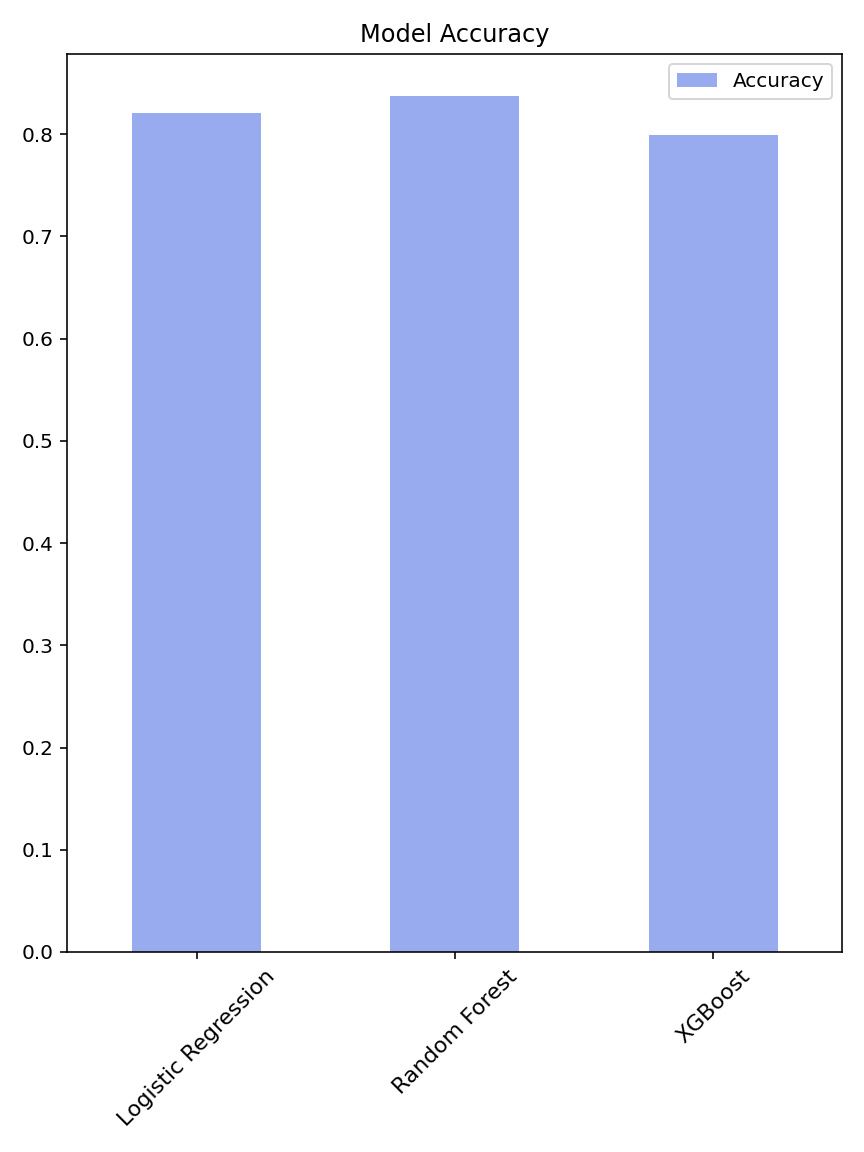

In [30]:
#Graphing the accuracy of the models using the defaults parameters
model_comparison=pd.DataFrame(model_scores, index=['Accuracy'])
fig, ax= plt.subplots(figsize=(6,8))
model_comparison.T.plot.bar(ax=ax, color='#98ABEE')
plt.xticks(rotation=45,fontsize=11)
plt.title('Model Accuracy')
plt.tight_layout();

In general we can see that we obtain the best performance using random forests. Lets try tunning the hyperparameters and using feature selection to evaluate which model has the best performance. Once we have found the optimal hyperparameters we will evaluate the model with confusion matrices, precision, recall, f1score, classification report, ROC/AUC curve to see which model is the most appropiate.

# Logistic Regression Model

Randomize search is useful to gain insights into what potential values result best, it doesn't try all combinations only selects randomly. With this we can have an idea of which values tend to perform well instead of going over all possible combinations. As we have multiple parameters we will do a randomize search instead of a grid search for logistic regression.

### Hyperparameter Tuning

In [31]:
#creating parameters for randomize search
hyperparameter_scores=[]
feature_scores=[]
random_params ={'C': np.logspace(-5,5,25),
                'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

np.random.seed(100)

In [32]:
# Define our random search for parameter tuning
randomsearch = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=random_params, 
                                  scoring='accuracy', 
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)

In [33]:
#fitting the data
randomsearch.fit(train_df, y_train)
randomsearch.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'newton-cholesky', 'C': 0.00825404185268019}

In [34]:
#evaluating the best model
randomsearch.score(test_df, y_test)

0.8260869565217391

In [35]:
hyperparameter_scores.append(randomsearch.score(test_df, y_test))

### Feature Importance

In [36]:
#creating and fitting the model
model_0=LogisticRegression(solver='newton-cholesky', C= 0.00825404185268019)
model_0.fit(train_df, y_train)

LogisticRegression(C=0.00825404185268019, solver='newton-cholesky')

In [37]:
#checking the coefficients correlation with terms of the target
#matching our coefficients to the feature columns
features_dict=dict(zip(train_df.columns, list(model_0.coef_[0])))
features_dict

{'Sex_M': 0.2442693005795078,
 'ChestPainType_ATA': -0.2935230311684866,
 'ChestPainType_NAP': -0.23950578125355776,
 'ChestPainType_TA': -0.09487357197435634,
 'ExerciseAngina_Y': 0.3225221171448147,
 'ST_Slope_Flat': 0.367091375309307,
 'ST_Slope_Up': -0.3697417623809396,
 'RestingECG_LVH': 0.03325678481279307,
 'RestingECG_ST': 0.05695083451988973,
 'Age': 0.10969996780538446,
 'RestingBP': 0.023609319804772034,
 'Cholesterol': -0.17827429046362286,
 'MaxHR': 0.2074412968158769,
 'Oldpeak': -0.2037189347391906,
 'FastingBS': 0.26026790190604404}

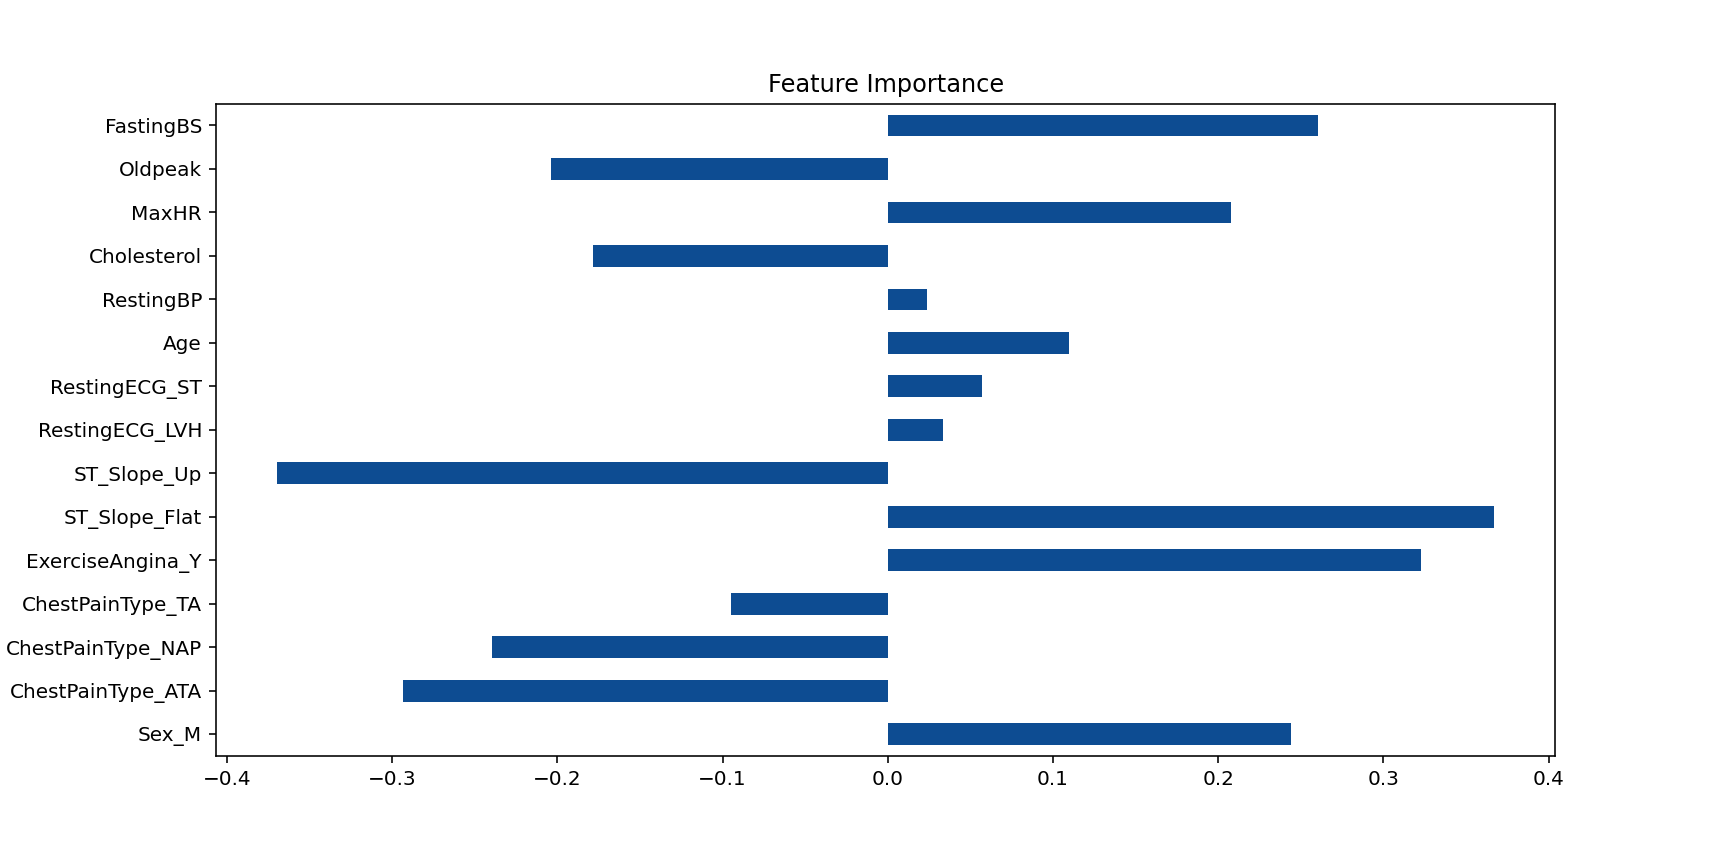

In [38]:
#visualizing feature importance
features_df=pd.DataFrame(features_dict, index=[0])
 
fig, ax= plt.subplots(figsize=(12,6))
features_df.T.plot.barh(title= 'Feature Importance', legend=False, ax=ax,  color='#0D4C92');

In [39]:
train_df.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_ST,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS
0,0.508925,-0.476891,-0.544812,-0.243235,-0.803579,-1.002729,1.137431,-0.494032,-0.494032,1.210180,-0.689980,-0.215267,-0.561616,0.108323,-0.476118
1,0.508925,-0.476891,-0.544812,-0.243235,1.244432,-1.002729,-0.879174,-0.494032,-0.494032,-1.628757,-1.254768,0.827924,-0.561616,-1.286577,0.563973
2,0.508925,-0.476891,-0.544812,-0.243235,-0.803579,-1.002729,1.137431,-0.494032,-0.494032,-0.261862,-0.125192,-1.863882,1.780577,1.303952,-1.516210
3,-1.964924,-0.476891,-0.544812,-0.243235,1.244432,0.997279,-0.879174,-0.494032,-0.494032,0.894742,1.004384,0.408785,-0.561616,0.666283,0.469420
4,-1.964924,-0.476891,-0.544812,-0.243235,-0.803579,0.997279,-0.879174,-0.494032,-0.494032,1.105034,-0.125192,0.958323,-0.561616,-0.609054,1.036742


In [40]:
#using the model but only with the selected features. 
#We select feature only having where the abs value is 0.25 or above.
feature_importance_train=train_df.drop(columns=['RestingECG_LVH','RestingECG_ST','Age','RestingBP','Cholesterol'])
feature_importance_test=test_df.drop(columns=['RestingECG_LVH','RestingECG_ST','Age','RestingBP','Cholesterol'])
model_1=LogisticRegression(solver='newton-cholesky', C= 0.00825404185268019)
model_1.fit(feature_importance_train, y_train)

LogisticRegression(C=0.00825404185268019, solver='newton-cholesky')

In [41]:
model_1.score(feature_importance_test, y_test)
feature_scores.append(model_1.score(feature_importance_test, y_test))

### Model Evaluation

In [42]:
#creating all function for evaluation

#creating a function that evaluates the confusion matrix
def conf_matrix(y_test, y_preds):
    """
    output: plots the confusion matrix report
    inputs: prediction and actual labels
    """
    
    conf_mat=confusion_matrix(y_test, y_preds)
    conf_mat_percent= conf_mat/ conf_mat.sum()*100
    fig, ax= plt.subplots(figsize=(4,4))
    ax= sns.heatmap(conf_mat_percent,
                    cmap= "crest",
                    annot=True,
                    cbar=False,
                    fmt='.2f',
                    ax= ax)
    
    for i in ax.texts:
        i.set_text(i.get_text() +'%')
        
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix')
    
#creating a function that evaluates accuracy, precision, recall and f1 score using cross validation
def cross_val_metrics(model, X, y):
    """
    output: plot of accuracy, precision, recall, and f1 score metrics
    input: model, training data, training labels
    """
    cv_acc= cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_acc= np.mean(cv_acc)
    
    cv_pre= cross_val_score(model, X, y, cv=5, scoring='precision')
    cv_pre= np.mean(cv_pre)
    
    cv_rec= cross_val_score(model, X, y, cv=5, scoring='recall')
    cv_rec= np.mean(cv_rec)
    
    cv_f1= cross_val_score(model, X, y, cv=5, scoring='f1')
    cv_f1= np.mean(cv_f1)
    
    cv_metrics= pd.DataFrame({'Accuracy': cv_acc,
                              'Precision': cv_pre,
                              'Recall': cv_rec,
                              'f1 Score': cv_f1},
                             index=[''])
    
    fig, ax= plt.subplots(figsize=(5,6))
    cv_metrics.T.plot.bar(title= 'Cross Validated Metrics',
                          legend=False,
                          ax=ax,
                          color='#37B5B6');
    
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width()/2, i.get_height() +0.01,
               f'{round(i.get_height(),2)}',
               ha='center', va='center')
        
#creating a function that evaluates ROC/AUC curves
def roc_auc_curves(model, x_test,y_test):
    """
    output: graph of the false positive rate compared to the true positive rate
    input: model, testing data, testing labels
    """
    display= RocCurveDisplay.from_estimator(model, x_test, y_test)
    plt.plot([0,1], [0,1],color='navy', lw=2, linestyle='--')
    plt.show()

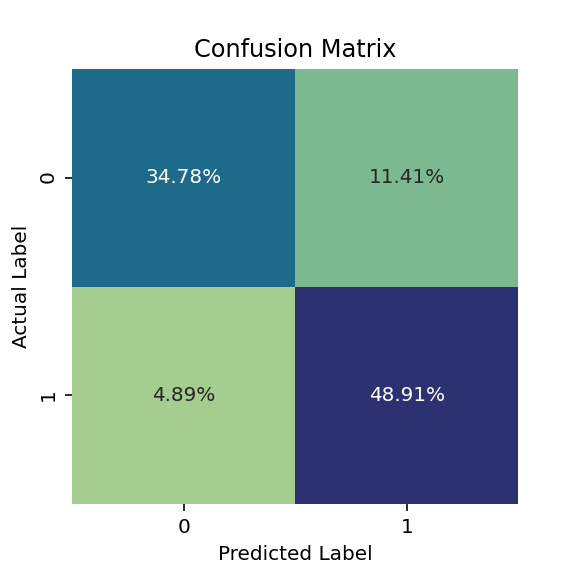

In [43]:
conf_matrix(y_test, model_1.predict(feature_importance_test))

We are getting a lot of false positives. This means that we diagnosed that the patient has a heart disease when they actually didnt have it. 
 * We dont consider this crucial as it can be a preventive measure to people that have symptoms, and provide them with enough time to get a proper diagnosis with a doctor.
 * Only 5% of the people that have a disease have been diagnosed with not having a heart disease, we want this precentage to be approximately equal to 0.

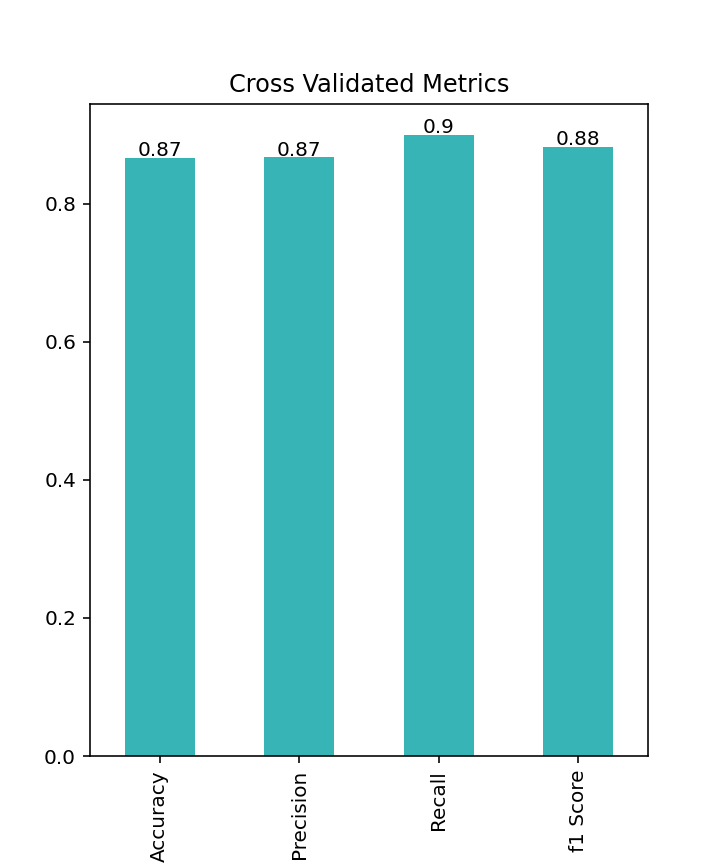

In [44]:
cross_val_metrics(model_1, feature_importance_train, y_train)

In this model we are prioritazing the recall score. This means the ability of the trained model to identify all the cases in which patients had a heart disease. In other words its the proportion of true positivesthat our model defined. We can see that in this case, the model performed the best in this paremeter having a total accuracy of 90%

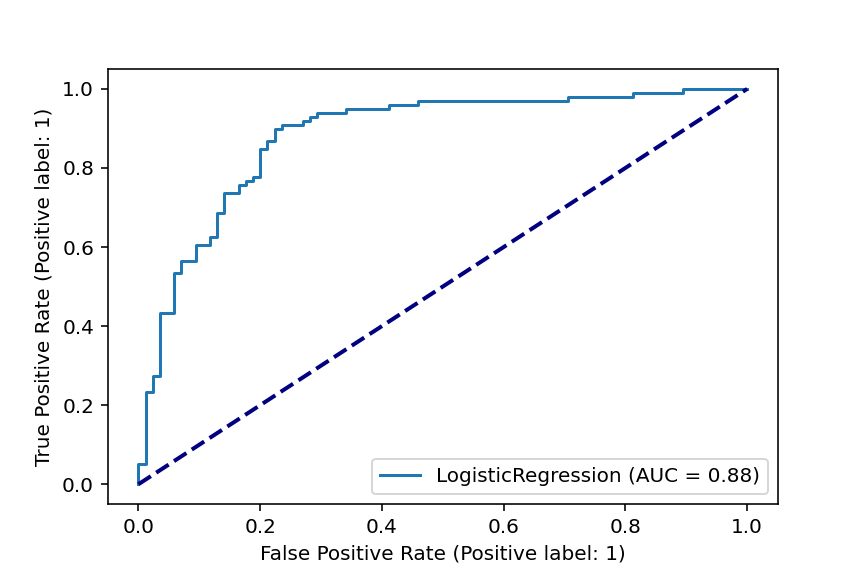

In [45]:
roc_auc_curves(model_1,  feature_importance_test,y_test)

The ROC/AUC curves tell us more about the trade-offs between sensititvity and specificity and various cutoff. It also tells us the overall accuracy of the test. In this case we had an overall score of 0.88.

# Random Forest Model

### Hyperparameter Tuning

In this case we decided to use grid search for the random forest model. Different to random search, the grid search searches all possibilities given the parameters we provided. We have to use this cautiously as it can be computationally expensive.

In [46]:
#establishing our grid parameters
grid_params ={'criterion': ['gini', 'entropy', 'log_loss'],
                'min_samples_split': [2,5,10],
                'min_samples_leaf': [1,3,8]}

In [47]:
#performing a gridsearch
gridsearch = GridSearchCV(RandomForestClassifier(),
                          param_grid=grid_params,
                          scoring='accuracy', 
                          cv=5,
                          verbose=True)

In [ ]:
#fitting the training data 
gridsearch.fit(train_df, y_train)
gridsearch.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
#scoring the model
gridsearch.score(test_df, y_test)
hyperparameter_scores.append(gridsearch.score(test_df, y_test))

### Feature Importance

In [ ]:
#creating and fitting the model
modelforest_0=RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2)
modelforest_0.fit(train_df, y_train)

In [ ]:
modelforest_0.feature_importances_

In [ ]:
#checking the coefficients correlation with terms of the target
#matching our coefficients to the feature columns
features_dict_1=dict(zip(train_df.columns, list(modelforest_0.feature_importances_)))
features_dict_1

In [ ]:
features_df_1=pd.DataFrame(features_dict_1, index=[0])
fig, ax= plt.subplots(figsize=(12,6))
features_df.T.plot.barh(title= 'Feature Importance', legend=False, ax=ax,  color='#0D4C92');

In [ ]:
#using the model but only with the selected features. 
#We select feature only having where the abs value is 0.5 or above.
feature_importance_train_1=train_df.drop(columns=['RestingECG_LVH','RestingECG_ST','RestingBP','MaxHR','Sex_M'])
feature_importance_test_1=test_df.drop(columns=['RestingECG_LVH','RestingECG_ST','RestingBP','MaxHR','Sex_M'])
modelforest_1=RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2)
modelforest_1.fit(feature_importance_train_1, y_train)

In [ ]:
modelforest_1.score(feature_importance_test_1, y_test)
feature_scores.append(modelforest_1.score(feature_importance_test_1, y_test))

Even if we do feature importance the codesnt change much, its the same if we leave it as it is. 

### Model Evaluation

In [ ]:
conf_matrix(y_test, modelforest_0.predict(test_df))

Even though the model was able to reduce the percentage of false positives, this model had higher false negatives. This means that there were more patients that had a heart disease and were diagnosed as if they didnt had it. This is not something we want. 

In [ ]:
cross_val_metrics(modelforest_0, train_df, y_train)

In addition, we are able to see that the recall once again is the highest metric.

In [ ]:
roc_auc_curves(modelforest_0, test_df, y_test)

The trade-offs between sensititvity and specificity in the beginning seems to be more like predicting a coin flip toss rather than actually predicting correctly if a patient has a heart disease or not. However, this score improves drastically.

# XGBoost

### Hyperparameter Tuning

In [ ]:
# increase in learning rate fluctuates, some tradeoff between accuracy and recall, alpha under 0.2 can boost recall but 
# overdoing alpha kills accuracy in name of recall, increasing reg_lambda also increase recall
model_xg = XGBClassifier(booster = 'gblinear', learning_rate = 0.3, reg_alpha = 0.03, reg_lambda = 0.8)
fit=model_xg.fit(train_df, y_train)
y_pred = model_xg.predict(test_df)
model_xg.score(test_df, y_test)

In [ ]:
print("fbeta:", metrics.fbeta_score(y_test, y_pred, average="weighted", beta=0.5))
hyperparameter_scores.append(model_xg.score(test_df, y_test))

### Feature Importance

In [ ]:
#visualizing feature importance
features_df=pd.DataFrame(features_dict, index=[0])
features_df_sorted= features_df.T.sort_values(by=0, ascending=False)
fig, ax= plt.subplots(figsize=(6,6))
features_df_sorted.plot.bar(title= 'Feature Importance', legend=False, ax=ax,  color='#0D4C92');
plt.xticks(fontsize=11)
plt.tight_layout()
# plot_importance(model_xg, max_num_features=15, importance_type="weight")
# plt.rcParams['figure.figsize'] = (40,10)
# plt.show()

In [ ]:
feature_importance_train_2=train_df.drop(columns=['RestingECG_LVH','RestingECG_ST','RestingBP'])
feature_importance_test_2=test_df.drop(columns=['RestingECG_LVH','RestingECG_ST','RestingBP'])

model_xg1 = XGBClassifier(booster = 'gblinear', learning_rate = 0.3, reg_alpha = 0.03, reg_lambda = 0.8)
model_xg1.fit(feature_importance_train_2, y_train)
model_xg1.score(feature_importance_test_2, y_test)
feature_scores.append(model_xg1.score(feature_importance_test_2, y_test))

### Model Evaluation

In [ ]:
conf_matrix(y_test, model_xg.predict(test_df))

In [ ]:
cross_val_metrics(model_xg, train_df, y_train)

In [ ]:
roc_auc_curves(model_xg, test_df, y_test)

# Comparison

In [ ]:
final_models=model_comparison.T

In [ ]:
final_models.rename(columns={'Accuracy': 'Default'}, inplace=True)
final_models['Hyperparameters']=hyperparameter_scores

In [ ]:
final_models

In [ ]:
fig, ax= plt.subplots(figsize=(8,8))
final_models.plot.bar(ax=ax, color=['#98ABEE', '#201658'])
plt.xticks(rotation=45,fontsize=11)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=11)
plt.title('Model Accuracy')
plt.tight_layout();

In [ ]:
final_models1=model_comparison.T
final_models1.rename(columns={'Accuracy': 'Default'}, inplace=True)
final_models1['Hyperparameters']=hyperparameter_scores
final_models1['Features']=feature_scores

fig, ax= plt.subplots(figsize=(7,8))
final_models1.plot.bar(ax=ax, color=['#98ABEE', '#201658','#37B5B6'])
plt.xticks(rotation=45,fontsize=11)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=11)
plt.title('Model Accuracy')
plt.tight_layout();

In [ ]:
def plotting2(df, column):
        """
        Input: Dataframe and a column to plot
        Output: Stacked bar graph of the relationship of the column selected and having a heart disease
        """
        return (p9.ggplot(df, p9.aes(x=column, fill='factor(HeartDisease)')) +
            p9.geom_bar(position='stack') +  
            
            #Adding title and axis    
            p9.labs(title=f'Relationship between {column} and Heart Disease',
                    x=column, y='Count', fill='Heart Disease') +
                
            #Personalizing the grid
            p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1, color="black"),
                     panel_grid_major=p9.element_blank(),
                     panel_grid_minor=p9.element_blank()) +
            p9.scale_fill_manual(values=['#98ABEE', '#201658']) +
            p9.theme(legend_position='right'))


plotting2(df, 'ExerciseAngina')

# Conclusions

The metrics for all of our models combined look the following:

In [ ]:
def key_metrics(model,X,y):
    """
    input: takes a model, its data and the actual results of the data
    output: obtains accuracy, precision, recall and f1 score
    """
    cv_acc= cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_acc= np.mean(cv_acc)

    cv_pre= cross_val_score(model, X, y, cv=5, scoring='precision')
    cv_pre= np.mean(cv_pre)

    cv_rec= cross_val_score(model, X, y, cv=5, scoring='recall')
    cv_rec= np.mean(cv_rec)

    cv_f1= cross_val_score(model, X, y, cv=5, scoring='f1')
    cv_f1= np.mean(cv_f1)

    return  pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_pre,
                          'Recall': cv_rec,
                          'f1 Score': cv_f1},
                         index=[''])

#using the function to predict the data from all the models used.
metrics1 = key_metrics(model_1,feature_importance_train, y_train)
metrics2 = key_metrics(modelforest_0, train_df, y_train)
metrics3 = key_metrics(model_xg, train_df, y_train)

#joining all metric in a table
metrics= pd.concat([metrics1, metrics2, metrics3])
metrics.insert(0, "Model", ['Logistic Regression', 'Random Forest', 'XGBoost'])

In [ ]:
metrics

Overall the model that performed the best was the XGBoost, it demosntrated a higher recall score. As we are using this model for assistance to doctors, the optimal model, would be the model that has the highest recall score, which in this case is XGBoost.

# Experimentation

* Could the model have performed better if we had more data, or if it had a balanced data set?
* Could we further improve the current models?

### Generating Extra Rows 

In [ ]:
# get the columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']
categorical_columns = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope', 'RestingECG','HeartDisease']
num_extra = 1000 #extra rows made
tobe_added_num = pd.DataFrame()
tobe_added_cat = pd.DataFrame()

# generate info for num columns
for col in numerical_columns:
    # get distribution and generate based off range of values
    distribution = df[col].value_counts(normalize=True)
    tobe_added_num[col] = np.random.choice(distribution.index, size=num_extra,p=distribution)
for col in categorical_columns:
    # get distribution and generate based off range of values
    distribution = df[col].value_counts(normalize=True)
    tobe_added_cat[col] = np.random.choice(distribution.index, size=num_extra,p=distribution)
        
# add together categorical and numerical columns then create new df w fake rows and old data
new_rows = pd.concat([tobe_added_cat, tobe_added_num], axis = 1)
new_rows = pd.concat([new_rows, df])
new_rows.shape

In [ ]:
# get the columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']
categorical_columns = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope', 'RestingECG','HeartDisease']
num_extra = 4000 #extra rows made
tobe_added_num2 = pd.DataFrame()
tobe_added_cat2 = pd.DataFrame()

# generate info for num columns
for col in numerical_columns:
    # get distribution and generate based off range of values
    distribution = df[col].value_counts(normalize=True)
    tobe_added_num2[col] = np.random.choice(distribution.index, size=num_extra,p=distribution)
for col in categorical_columns:
    # get distribution and generate based off range of values
    distribution = df[col].value_counts(normalize=True)
    tobe_added_cat2[col] = np.random.choice(distribution.index, size=num_extra,p=distribution)
    
# add together categorical and numerical columns then create new df w fake rows and old data
big_rows = pd.concat([tobe_added_cat2, tobe_added_num2], axis = 1)
big_rows = pd.concat([big_rows, new_rows])
big_rows.shape

In [ ]:
# create training sets for fake rows
y2 = new_rows['HeartDisease']
X2 = new_rows.drop(columns=['HeartDisease'],axis=1)
y3 = big_rows['HeartDisease']
X3 = big_rows.drop(columns=['HeartDisease'],axis=1)

#splitting the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=11)
X_train2, X_test2, y_train2, y_test2=train_test_split(X2,y2, test_size=0.2, random_state=11)
X_train3, X_test3, y_train3, y_test3=train_test_split(X3,y3, test_size=0.2, random_state=11)

# each set prepped
train_df=data_preparation(X_train)
test_df=data_preparation(X_test)
train_df2=data_preparation(X_train2)
test_df2=data_preparation(X_test2)
train_df3=data_preparation(X_train3)
test_df3=data_preparation(X_test3)

### XGBoost

In [ ]:
# increase in learning rate fluctuates, some tradeoff between accuracy and recall, alpha under 0.2 can boost recall but 
# overdoing alpha kills accuracy in name of recall, increasing reg_lambda also increase recall
model_xg = XGBClassifier(booster = 'gblinear', learning_rate = 0.3, reg_alpha = 0.03, reg_lambda = 0.8)
model_xg.fit(train_df, y_train)
y_pred = model_xg.predict(test_df)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("fbeta:", metrics.fbeta_score(y_test, y_pred, average="weighted", beta=0.5))

### XGBoost with 1000 generated rows

In [ ]:
# 1000 rows
model_xg2 = XGBClassifier(booster = 'gblinear', learning_rate = 0.3, reg_alpha = 0.03, reg_lambda = 0.34)
model_xg2.fit(train_df2, y_train2)
y_pred = model_xg2.predict(test_df2)
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred))
print("Precision:", metrics.precision_score(y_test2, y_pred))
print("Recall:", metrics.recall_score(y_test2, y_pred))
print("fbeta:", metrics.fbeta_score(y_test2, y_pred, average="weighted", beta=0.5))

### XGBoost w 5000 Generated Rows

In [ ]:
# 5000 rows
model_xg3 = XGBClassifier(booster = 'gblinear', learning_rate = 0.3, reg_alpha = 0.03, reg_lambda = 0.8)
model_xg3.fit(train_df3, y_train3)
y_pred = model_xg3.predict(test_df3)
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred))
print("Precision:", metrics.precision_score(y_test3, y_pred))
print("Recall:", metrics.recall_score(y_test3, y_pred))
print("fbeta:", metrics.fbeta_score(y_test3, y_pred, average="weighted", beta=0.5))

In [ ]:
features_dict=dict(zip(train_df.columns, list(model_xg.coef_)))
#visualizing feature importance
features_df=pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title= 'Feature Importance', legend=False);
# plot_importance(model_xg, max_num_features=15, importance_type="weight")

In [ ]:
features_dict2=dict(zip(train_df2.columns, list(model_xg2.coef_)))
#visualizing feature importance
features_df2=pd.DataFrame(features_dict2, index=[0])
features_df2.T.plot.bar(title= 'Feature Importance', legend=False);
# plot_importance(model_xg, max_num_features=15, importance_type="weight")

In [ ]:
features_dict3=dict(zip(train_df3.columns, list(model_xg3.coef_)))
#visualizing feature importance
features_df3=pd.DataFrame(features_dict3, index=[0])
features_df3.T.plot.bar(title= 'Feature Importance', legend=False);
# plot_importance(model_xg, max_num_features=15, importance_type="weight")
# plt.rcParams['figure.figsize'] = (40,10)
# plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
def key_metrics(model,X,y):
    cv_acc= cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_acc= np.mean(cv_acc)

    cv_pre= cross_val_score(model, X, y, cv=5, scoring='precision')
    cv_pre= np.mean(cv_pre)

    cv_rec= cross_val_score(model, X, y, cv=5, scoring='recall')
    cv_rec= np.mean(cv_rec)

    cv_f1= cross_val_score(model, X, y, cv=5, scoring='f1')
    cv_f1= np.mean(cv_f1)

    return  pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_pre,
                          'Recall': cv_rec,
                          'f1 Score': cv_f1},
                         index=[''])

# create the three different XGBoost models
metrics1 = key_metrics(model_xg, train_df, y_train)
metrics2 = key_metrics(model_xg2, train_df2, y_train2)
metrics3 = key_metrics(model_xg3, train_df3, y_train3)

#joining all metric in a table
metrics_fin= pd.concat([metrics1, metrics2, metrics3])
metrics_fin.insert(0, "Model", ['XGBoost','XGBoost_1000','XGBoost_5000'])
metrics_fin.head()

We can see that overall, the model does not improve when we generate 'artifical' data. Therefore we will choose to save the XGBoost model as our final model. Since it had the best recall score.

# Saving the Model

In [ ]:
#saves a model so we dont have to train it or load the data again
output_file=open('xg_boost.pickle','wb')
pickle.dump(model_xg, output_file)
output_file.close()

In [ ]:
#loading the file
model_file=open('xg_boost.pickle','rb')
model=pickle.load(model_file)
model_file.close()

In [ ]:
#we can use this once again to get the results
model.score(test_df, y_test)